# CIA World Factbook Project- SQLite and Python

### Getting started

In [1]:
import pandas as pd
import sqlite3

conn= sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


### Looking at some summary statistics regarding the populations

In [6]:
q3= '''
select MIN(population), MAX(population),
MIN(population_growth), MAX(population_growth) 
from facts
'''
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


### Investigating the minimum and maximum values as they look suspicious

In [7]:
q3= "select name, population from facts where population =0"
pd.read_sql_query(q3, conn)

,name,population
0,Antarctica,0


In [10]:
q4= '''
select name, population from facts where population =7256490011
'''
pd.read_sql_query(q4, conn)

,name,population
0,World,7256490011


Unsurprisingly the country with a population of 0 is really an uninhabitable place. And the highest population of 7 billion is simply that of the whole world

C:\Users\nadir\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000120C1B51198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000120C18910B8>]], dtype=object)

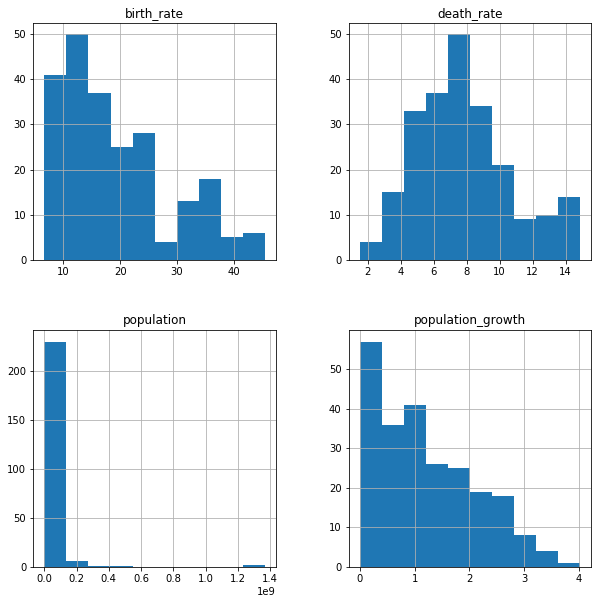

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != 0
and population != 7256490011
'''
pd.read_sql_query(q6, conn).hist(ax=ax)
